In [2]:
"""
===========================================================
Using PyPARRM to filter out stimulation artefacts from data
===========================================================

This example demonstrates how the PARRM algorithm :footcite:`DastinEtAl2021`
can be used to identify and remove stimulation artefacts from
electrophysiological data in the PyPARRM package.
"""

import numpy as np
from matplotlib import pyplot as plt

import sys
import sys
sys.path.append('../../tool_code/python_tool_code/function/') # "~~/tool_code/plot/" (상대 경로)
sys.path.append('../../tool_code/python_tool_code/frequency_dataset_generation/')

from DataPlot import Data_Load_Plot, Result_Plot, Result_Plot_paper, Loss_Plot
from Scaling import time_scaling, time_inv_scaling
from FFT_func import FFT

sys.path.append('../existing_SAC/PARRM/PyPARRM-main/src/pyparrm/')

from parrm import PARRM
from _utils._power import compute_psd

fpath = "C:/Users/stell/OneDrive/바탕 화면/10000_data/"
# fpath = "../data/synthetic_data/1000_data/"

Contaminated = np.load(fpath + "contaminated_by_realistic" + ".npy")
Clean = np.load(fpath + "clean_data" + ".npy")

print(Contaminated.shape)
print(Clean.shape)

ModuleNotFoundError: No module named 'parrm'

In [2]:
fs = 2000  # Hz
artefact_freq = 125  # Hz

winTime = 0.99
skipTime = winTime / 30
perDist = 0.01

# winTime = 0.5 
# skipTime = winTime / 10  
# perDist = 0.01

winSize = int(fs*winTime)  
skipSize = int(fs*skipTime)
winDir = "both"

print(
    f"`data` has shape: ({Contaminated.shape[0]} channel, "
    f"{Contaminated.shape[1]} timepoints)\n"
    f"`data` duration: {Contaminated.shape[1] / fs :.2f} seconds"
)

`data` has shape: (2000 channel, 4000 timepoints)
`data` duration: 2.00 seconds


In [3]:
parrmed = []

for i in range(Contaminated.shape[0]):
    parrm = PARRM(
        data=Contaminated[i].reshape(1, -1),
        sampling_freq=fs,
        artefact_freq=artefact_freq,
        verbose=False,  # silenced to reduce pqdm output clutter
    )

    parrm.find_period()

    print(f"Sample : {i} | Estimated artefact period: {parrm.period :.4f}")

    parrm.create_filter(
        filter_half_width=winSize,
        omit_n_samples=skipSize,
        filter_direction=winDir,
        period_half_width=perDist,
    )
    parrmed_data = parrm.filter_data()  # other data to filter can be given here
    parrmed.append(parrmed_data)


Sample : 0 | Estimated artefact period: 16.0003
Sample : 1 | Estimated artefact period: 17.6008
Sample : 2 | Estimated artefact period: 16.0004
Sample : 3 | Estimated artefact period: 17.6007
Sample : 4 | Estimated artefact period: 16.0004
Sample : 5 | Estimated artefact period: 16.0004
Sample : 6 | Estimated artefact period: 17.6009
Sample : 7 | Estimated artefact period: 16.0003
Sample : 8 | Estimated artefact period: 16.0004
Sample : 9 | Estimated artefact period: 16.0003
Sample : 10 | Estimated artefact period: 16.0003
Sample : 11 | Estimated artefact period: 16.0003
Sample : 12 | Estimated artefact period: 16.0004
Sample : 13 | Estimated artefact period: 16.0004
Sample : 14 | Estimated artefact period: 16.0004
Sample : 15 | Estimated artefact period: 17.6006
Sample : 16 | Estimated artefact period: 17.6005
Sample : 17 | Estimated artefact period: 16.0003
Sample : 18 | Estimated artefact period: 16.0003
Sample : 19 | Estimated artefact period: 16.0003
Sample : 20 | Estimated artefa

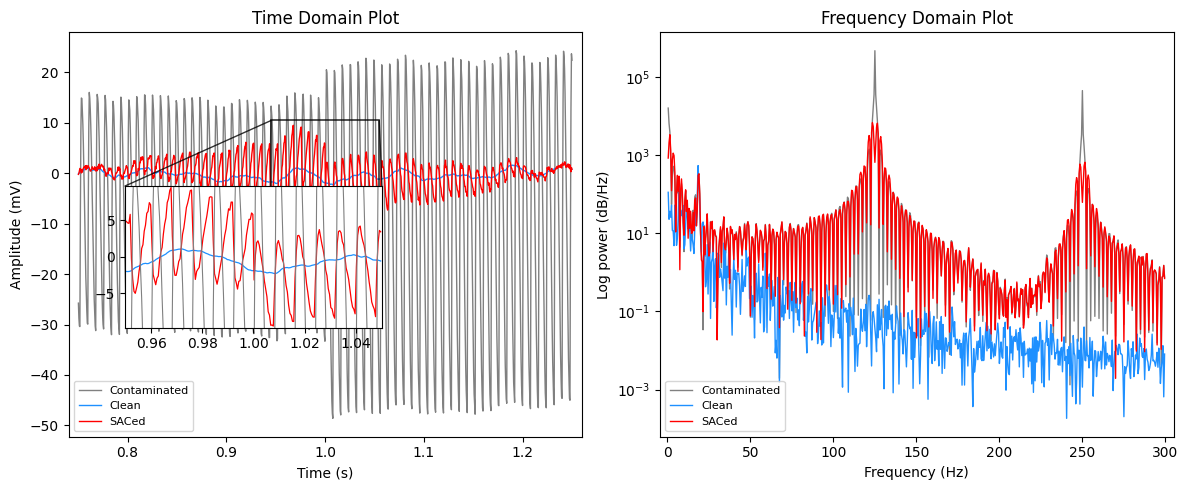

< MSE >
Time Domain MSE: 115.42817380867841 ± 134.78683534664577
Frequency Domain MSE: 133481205.46942657 ± 285956814.9321728
Time + Frequency MSE: 402330.7257572983 ± 1161425.241928939


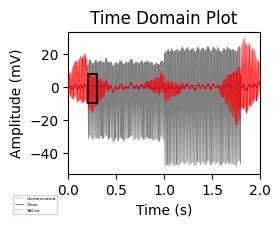

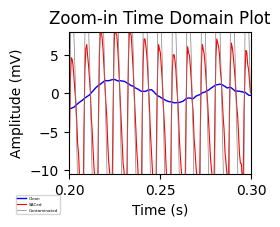

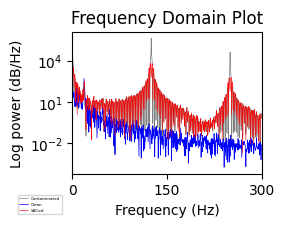

< MSE >
Time Domain MSE: 115.42817380867841 ± 134.78683534664577
Frequency Domain MSE: 133481205.46942657 ± 285956814.9321728
Time + Frequency MSE: 402330.7257572983 ± 1161425.241928939


In [4]:
save_path = '../result/evaluation/'
save_title = 'PARRM'
parrmed = np.array(parrmed)
parrmed = parrmed.reshape(2000,-1)

# t = np.arange(0, 2, 1/fs)
# plt.figure()
# plt.plot(t, Contaminated[1].reshape(-1), label='Contaminated', lw = 0.5)
# plt.plot(t, parrmed[1].reshape(-1), label='PARRMed', lw = 0.5)
# plt.plot(t, Clean[1].reshape(-1), label='Clean', lw = 0.5)
# plt.legend()
# plt.show()

Result_Plot(Contaminated, parrmed, Clean)
Result_Plot_paper(Contaminated, parrmed, Clean, save_path, save_title)